In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\fatih\Downloads\Advertising (1).csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
df.shape

(200, 4)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
# I am trying to figure out how outlier can
# chance mean and std

print("mean :" , np.mean([100,110,250,400]))
print("std  :" , np.std([100,110,250,400]))

mean : 215.0
std  : 122.16791722870616


In [21]:
print("mean :" , np.mean([100,110,250,800]))
print("std  :" , np.std([100,110,250,800]))

mean : 315.0
std  : 286.2254356272342


<AxesSubplot:xlabel='TV', ylabel='Count'>

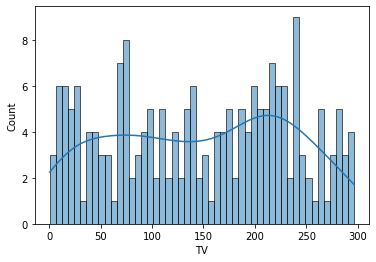

In [22]:
# Looking for outlier value with histplot
sns.histplot(df.TV, bins=50, kde=True)

<AxesSubplot:xlabel='TV'>

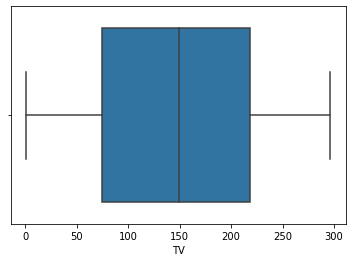

In [23]:
sns.boxplot(df.TV)

In [25]:
# I am triyng to to create independent variable with my data
# I did valuable feature engineering

df["Total_spend"] = df["TV"] + df["newspaper"] + df["radio"]

In [26]:
df

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [29]:
# I am tring to put target end of the df, to make readable code especially
# in pairplot etc

df = df.iloc[:,[0,1,2,4,3]]
df.head()


,TV,radio,newspaper,Total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


In [41]:
# I am going to investigate there is a corellation between 
# my target and feature

df["sales"].corr(df["TV"])

0.7822244248616066

It seems like there is a big correlation between TV and sales 

In [ ]:
#Let's look at correlation between "temperature" and "ice_cream_sale"


In [62]:
my_dict = {"temperature"   : [30, 31, 32, 33, 34,35],
           "ice_cream_sale" : [50, 60, 65, 70, 75, 79]}


df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,60
2,32,65
3,33,70
4,34,75
5,35,79


In [63]:
#Let's look at correlation
df2.temperature.corr(df2["ice_cream_sale"])

#There is really high correlation between two variable

0.98710455392748

In [65]:
my_dict1 = {"temperature" : [30,31,32,33,34,35],
           "ice_cream_sale" : [50,51,52,53,55,56]}

In [66]:
df2 = pd.DataFrame(my_dict1)
df2

,temperature,ice_cream_sale
0,30,50
1,31,51
2,32,52
3,33,53
4,34,55
5,35,56


In [67]:
df2.temperature.corr(df2["ice_cream_sale"])

0.9921609337929049

# When we add 1 instead of 5 we have higher correlation

In [71]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<10}: {df.sales.corr(df[i])}")



# I am trying to understand correlations between features and target label

corr between sales and TV        : 0.7822244248616066
corr between sales and radio     : 0.5762225745710552
corr between sales and newspaper : 0.22829902637616534
corr between sales and Total_spend: 0.8677123027017418


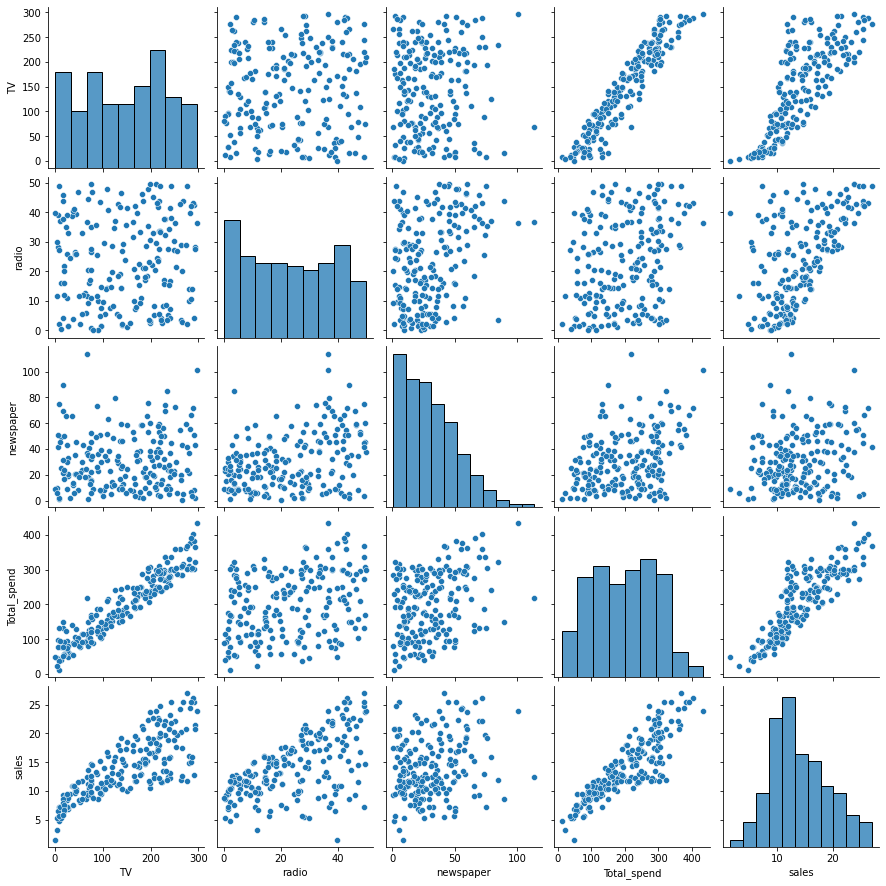

In [72]:
sns.pairplot(df)

In [73]:
df.corr()

,TV,radio,newspaper,Total_spend,sales
TV,1.000000,0.054809,0.056648,0.945330,0.782224
radio,0.054809,1.000000,0.354104,0.293211,0.576223
newspaper,0.056648,0.354104,1.000000,0.343059,0.228299
Total_spend,0.945330,0.293211,0.343059,1.000000,0.867712
sales,0.782224,0.576223,0.228299,0.867712,1.000000


<AxesSubplot:>

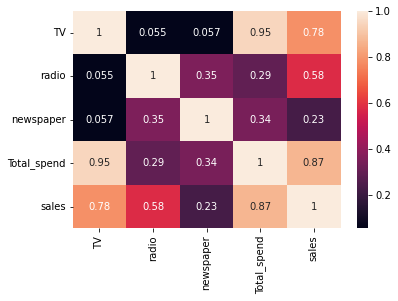

In [74]:
sns.heatmap(df.corr(), annot=True)

I realized highest correlation with sales is Total_spend

In [75]:
df = df[["sales", "Total_spend"]]
df

,sales,Total_spend
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0
...,...,...
195,7.6,55.7
196,9.7,107.2
197,12.8,192.7
198,25.5,391.8


Let's look at scatterplot

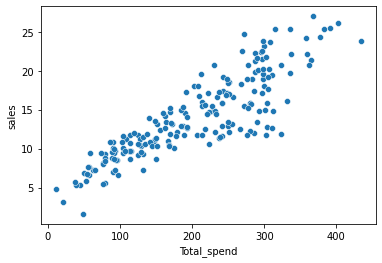

In [77]:
sns.scatterplot(x = "Total_spend", y = "sales" , data=df);


# We can see there is a meaninful relationship between two

In [78]:
# Let's look at correlation


corr = df.Total_spend.corr(df["sales"])
corr

0.8677123027017419

In [80]:
R2_score = corr**2
R2_score


# R2_score imply how much we can explain real life with a model that we have 

0.7529246402599594

I want to plot my regression line

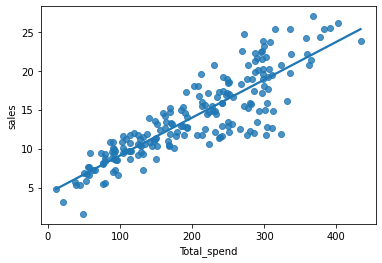

In [83]:
sns.regplot(x="Total_spend", y="sales", data=df, ci =None);


# I used regplot for best line

In [85]:
X = df["Total_spend"]
y = df["sales"]

In [86]:
np.polyfit(X, y, deg = 1)

# I used polyfit function to find coefficient of features

array([0.04868788, 4.24302822])

In [87]:
slope, intercept = np.polyfit(X, y, deg = 1)

# Slope coefficient of the feature
# intercept is value of y when x = 0

In [88]:
print("slope : " , slope)
print("intercept : ", intercept)

slope :  0.048687879319048145
intercept :  4.2430282160363255


In [89]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: Total_spend, Length: 200, dtype: float64

In [90]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [92]:
b1 , b0 = np.polyfit(X,y, deg=1)

In [93]:
print("b1 : " , b1)
print("b0 : " , b0)

b1 :  0.048687879319048145
b0 :  4.2430282160363255


In [94]:
y_pred = b1*X + b0
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: Total_spend, Length: 200, dtype: float64

In [95]:
values= {"actual" : y , "predicted" : y_pred , "residual" : y-y_pred , "LSE" : (y-y_pred)**2 , "ABS" : abs(y-y_pred)}
df2 = pd.DataFrame(values)
df2





# I calculated actual value, predicted value, residual value also LSE and ABS.

,actual,predicted,residual,LSE,ABS
0,22.1,20.655712,1.444288,2.085967,1.444288
1,10.4,10.518896,-0.118896,0.014136,0.118896
2,9.3,10.689303,-1.389303,1.930164,1.389303
3,18.5,16.478292,2.021708,4.087302,2.021708
4,12.9,16.414998,-3.514998,12.355211,3.514998
...,...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098,0.645057
196,9.7,9.462369,0.237631,0.056469,0.237631
197,12.8,13.625183,-0.825183,0.680926,0.825183
198,25.5,23.318939,2.181061,4.757026,2.181061


In [96]:
df2.residual.sum().round()

# I proved sum of the residuals is 0

0.0

I want to make prediction with simpe lineer regression

In [97]:
potential_spend = np.linspace(0,500,100)
potential_spend 


array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [98]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin



# I multiplied potential_spend with b1 and add b0 and looking for estimate

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21